In [1]:
import os
import pathlib
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import Image, ImageOps
from IPython.display import display
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import rcParams
import warnings

In [2]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
warnings.filterwarnings('ignore')

In [3]:
def process_image(img_path: str) -> np.array:
    img = Image.open(img_path)
    img = ImageOps.grayscale(img)
    img = img.resize(size=(96, 96))
    img = np.ravel(img) / 255.0
    return img

In [10]:
def process_folder(folder: pathlib.PosixPath) -> pd.DataFrame:
    # We'll store the images here
    processed = []
    
    # For every image in the directory
    for img in folder.iterdir():
        # Ensure JPG
        if img.suffix == '.jpg':
            # Two images failed for whatever reason, so let's just ignore them
            try:
                processed.append(process_image(img_path=str(img)))
            except Exception as _:
                continue
           
    # Convert to pd.DataFrame
    processed = pd.DataFrame(processed)
    # Add a class column - dog or a cat
    processed['class'] = folder.parts[-1]
    
    return processed

In [13]:
%%time

train_cat = process_folder(folder=pathlib.Path.cwd().joinpath('data/train/cat'))
train_dog = process_folder(folder=pathlib.Path.cwd().joinpath('data/train/dog'))

train_set = pd.concat([train_cat, train_dog], axis=0)

with open('train_set.pkl', 'wb') as f:
    pickle.dump(train_set, f)

CPU times: user 2min 38s, sys: 40.8 s, total: 3min 19s
Wall time: 4min 38s


In [14]:
train_set.head()

,0,1,2,3,4,5,6,7,8,9,...,9207,9208,9209,9210,9211,9212,9213,9214,9215,class
0,0.694118,0.698039,0.670588,0.505882,0.615686,0.690196,0.674510,0.654902,0.533333,0.666667,...,0.262745,0.258824,0.223529,0.490196,0.850980,0.596078,0.552941,0.647059,0.682353,cat
1,0.360784,0.356863,0.313725,0.313725,0.345098,0.333333,0.349020,0.360784,0.349020,0.400000,...,0.047059,0.047059,0.050980,0.050980,0.062745,0.035294,0.023529,0.094118,0.141176,cat
2,0.329412,0.329412,0.325490,0.325490,0.325490,0.325490,0.325490,0.329412,0.321569,0.317647,...,0.850980,0.835294,0.807843,0.768627,0.745098,0.721569,0.694118,0.654902,0.611765,cat
3,0.517647,0.439216,0.388235,0.396078,0.403922,0.403922,0.407843,0.411765,0.415686,0.419608,...,0.992157,0.992157,0.996078,1.000000,0.988235,0.960784,0.976471,0.968627,0.960784,cat
4,0.188235,0.207843,0.254902,0.305882,0.313725,0.403922,0.454902,0.470588,0.490196,0.396078,...,0.745098,0.721569,0.725490,0.623529,0.333333,0.650980,0.643137,0.639216,0.541176,cat


In [15]:
train_set.shape


(20031, 9217)

In [16]:
%%time

test_cat = process_folder(folder=pathlib.Path.cwd().joinpath('data/test/cat'))
test_dog = process_folder(folder=pathlib.Path.cwd().joinpath('data/test/dog'))

test_set = pd.concat([test_cat, test_dog], axis=0)

with open('test_set.pkl', 'wb') as f:
    pickle.dump(test_set, f)


CPU times: user 15.7 s, sys: 1.93 s, total: 17.6 s
Wall time: 23.9 s


In [17]:
test_set.shape


(2489, 9217)

In [18]:

%%time

valid_cat = process_folder(folder=pathlib.Path.cwd().joinpath('data/validation/cat'))
valid_dog = process_folder(folder=pathlib.Path.cwd().joinpath('data/validation/dog'))

valid_set = pd.concat([valid_cat, valid_dog], axis=0)

with open('valid_set.pkl', 'wb') as f:
    pickle.dump(valid_set, f)

CPU times: user 15.8 s, sys: 1.94 s, total: 17.8 s
Wall time: 25.6 s


In [19]:
valid_set.shape


(2478, 9217)

In [20]:
train_set = shuffle(train_set).reset_index(drop=True)
valid_set = shuffle(valid_set).reset_index(drop=True)

In [21]:
train_set.head()


,0,1,2,3,4,5,6,7,8,9,...,9207,9208,9209,9210,9211,9212,9213,9214,9215,class
0,0.517647,0.517647,0.513725,0.513725,0.513725,0.517647,0.517647,0.517647,0.517647,0.513725,...,0.447059,0.447059,0.443137,0.439216,0.439216,0.384314,0.200000,0.223529,0.227451,dog
1,0.188235,0.125490,0.113725,0.117647,0.101961,0.090196,0.125490,0.176471,0.145098,0.180392,...,0.345098,0.341176,0.337255,0.337255,0.360784,0.376471,0.360784,0.372549,0.368627,dog
2,0.858824,0.847059,0.843137,0.811765,0.827451,0.827451,0.811765,0.772549,0.752941,0.760784,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,cat
3,0.478431,0.521569,0.537255,0.549020,0.537255,0.545098,0.529412,0.537255,0.596078,0.517647,...,0.635294,0.627451,0.619608,0.631373,0.615686,0.603922,0.627451,0.615686,0.619608,dog
4,0.317647,0.317647,0.321569,0.325490,0.341176,0.349020,0.337255,0.341176,0.356863,0.364706,...,0.607843,0.596078,0.588235,0.588235,0.588235,0.572549,0.580392,0.584314,0.596078,dog


In [22]:
X_train = train_set.drop('class', axis=1)
y_train = train_set['class']

X_valid = valid_set.drop('class', axis=1)
y_valid = valid_set['class']

X_test = test_set.drop('class', axis=1)
y_test = test_set['class']

In [23]:
y_train.factorize()


(array([0, 0, 1, ..., 0, 1, 0]), Index(['dog', 'cat'], dtype='object'))

In [24]:
y_train = tf.keras.utils.to_categorical(y_train.factorize()[0], num_classes=2)
y_valid = tf.keras.utils.to_categorical(y_valid.factorize()[0], num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test.factorize()[0], num_classes=2)


In [25]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=128,
    validation_data=(X_valid, y_valid)
)


Epoch 1/100
157/157 [==============================] - 31s 188ms/step - loss: 1.0619 - accuracy: 0.5190 - val_loss: 0.6666 - val_accuracy: 0.6017
Epoch 2/100
157/157 [==============================] - 30s 188ms/step - loss: 0.6734 - accuracy: 0.5806 - val_loss: 0.6619 - val_accuracy: 0.6073
Epoch 3/100
157/157 [==============================] - 30s 190ms/step - loss: 0.6626 - accuracy: 0.6014 - val_loss: 0.6579 - val_accuracy: 0.6126
Epoch 4/100
157/157 [==============================] - 34s 218ms/step - loss: 0.6580 - accuracy: 0.6042 - val_loss: 0.6627 - val_accuracy: 0.5985
Epoch 5/100
157/157 [==============================] - 36s 230ms/step - loss: 0.6546 - accuracy: 0.6085 - val_loss: 0.6619 - val_accuracy: 0.6045
Epoch 6/100
157/157 [==============================] - 35s 224ms/step - loss: 0.6550 - accuracy: 0.6110 - val_loss: 0.6699 - val_accuracy: 0.6098
Epoch 7/100
157/157 [==============================] - 43s 278ms/step - loss: 0.6518 - accuracy: 0.6142 - val_loss: 0.6590 -

Epoch 57/100
157/157 [==============================] - 20s 129ms/step - loss: 0.5117 - accuracy: 0.7358 - val_loss: 0.7732 - val_accuracy: 0.6069
Epoch 58/100
157/157 [==============================] - 25s 158ms/step - loss: 0.5059 - accuracy: 0.7390 - val_loss: 0.7665 - val_accuracy: 0.6106
Epoch 59/100
157/157 [==============================] - 22s 137ms/step - loss: 0.5021 - accuracy: 0.7429 - val_loss: 0.8609 - val_accuracy: 0.6130
Epoch 60/100
157/157 [==============================] - 22s 140ms/step - loss: 0.4988 - accuracy: 0.7419 - val_loss: 0.8164 - val_accuracy: 0.6146
Epoch 61/100
157/157 [==============================] - 22s 142ms/step - loss: 0.4974 - accuracy: 0.7434 - val_loss: 0.7877 - val_accuracy: 0.5908
Epoch 62/100
157/157 [==============================] - 26s 168ms/step - loss: 0.4926 - accuracy: 0.7489 - val_loss: 0.7991 - val_accuracy: 0.6219
Epoch 63/100
157/157 [==============================] - 28s 175ms/step - loss: 0.4919 - accuracy: 0.7498 - val_loss: 0

In [26]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

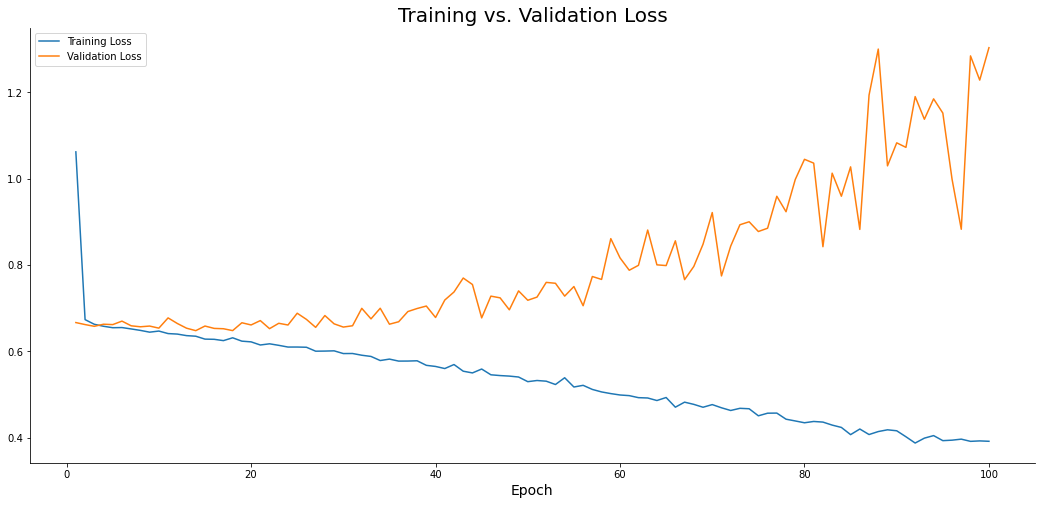

In [27]:
plt.plot(np.arange(1, 101), history.history['loss'], label='Training Loss')
plt.plot(np.arange(1, 101), history.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

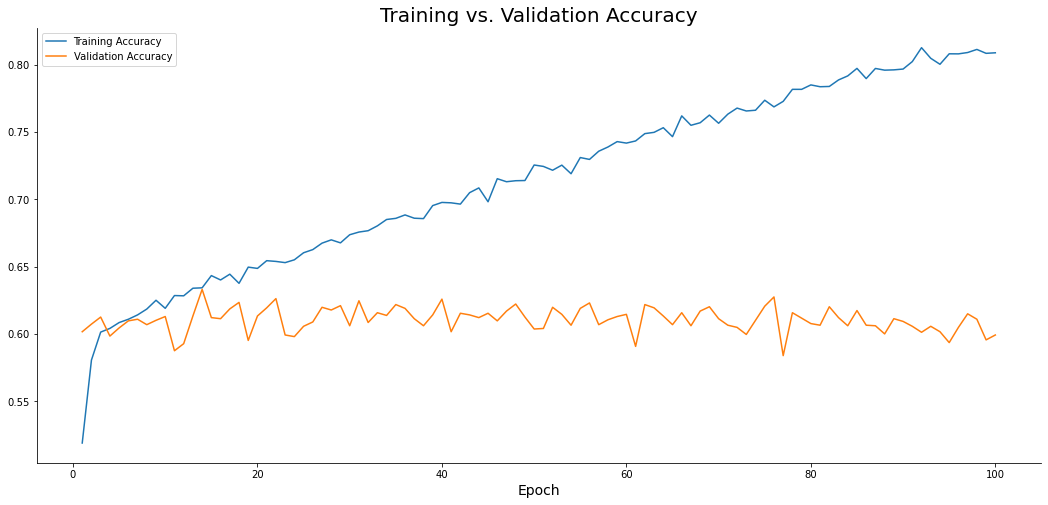

In [28]:
plt.plot(np.arange(1, 101), history.history['accuracy'], label='Training Accuracy')
plt.plot(np.arange(1, 101), history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();